In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
corpus_raw = """He is the king . The king is royal . She is the royal queen . King lives with Queen . Man lives with woman . King is a man . Queen is a woman . Queen talks to king . Woman talks to man . King marries queen . Man marries woman . He is a man . She is a queen . Man is a king . Queen is a woman """

In [0]:
# convert to lower case
corpus_raw = corpus_raw.lower()

In [0]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

In [0]:
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

In [0]:
words

{'a',
 'he',
 'is',
 'king',
 'lives',
 'man',
 'marries',
 'queen',
 'royal',
 'she',
 'talks',
 'the',
 'to',
 'with',
 'woman'}

In [0]:
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [0]:
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [0]:
WINDOW_SIZE = 2

In [0]:
data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

In [0]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen'], ['king', 'lives', 'with', 'queen'], ['man', 'lives', 'with', 'woman'], ['king', 'is', 'a', 'man'], ['queen', 'is', 'a', 'woman'], ['queen', 'talks', 'to', 'king'], ['woman', 'talks', 'to', 'man'], ['king', 'marries', 'queen'], ['man', 'marries', 'woman'], ['he', 'is', 'a', 'man'], ['she', 'is', 'a', 'queen'], ['man', 'is', 'a', 'king'], ['queen', 'is', 'a', 'woman']]


In [0]:
data[:5]

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king']]

In [0]:
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp


In [0]:
x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

In [0]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [0]:
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

In [0]:
EMBEDDING_DIM = 30 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))

In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

In [0]:
# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

In [0]:
n_iters = 50000
# train for n_iter iterations

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

In [0]:
vectors = sess.run(W1 + b1)

In [0]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

In [0]:
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [0]:
from sklearn.manifold import TSNE

model = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

In [0]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

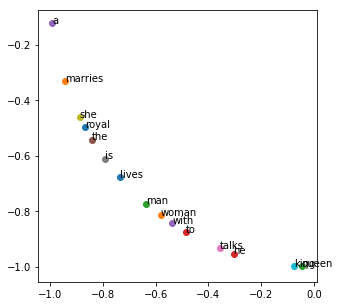

In [0]:

plt.figure(figsize=(5, 5))
for word in words:
  x = vectors[word2int[word]][0]
  y = vectors[word2int[word]][1]
  plt.scatter(x, y)
  plt.annotate(word, xy = (x, y))